In [5]:
# import pacckages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline


In [6]:
df = pd.read_csv("datasets/grades.csv", index_col=0)
df.info()
print(df.head)

<class 'pandas.core.frame.DataFrame'>
Index: 26 entries, Arnold to Zayn
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Physics  26 non-null     int64
 1   Biology  26 non-null     int64
 2   Maths    26 non-null     int64
dtypes: int64(3)
memory usage: 832.0+ bytes
<bound method NDFrame.head of            Physics  Biology  Maths
Name                              
Arnold          80       78     70
Bob             60       98     45
Cassandra       34       56     65
Donovan         56       65     32
Emily           98       23     55
Fabian          45       44     60
Grom            12       66     80
Hilary          60       88     78
Ivan            45       97     99
John            98       80     84
Kevin           78       78     65
Loius           56       66     66
Mandy           95       56     87
Natalie         75       78     60
Oliver          80       98     89
Patrick         69       56     85
Quiton      

In [6]:
print(os.getcwd())

c:\Users\suhaimi\Desktop\CIAST_AI_PART2


In [13]:
df.describe()

,Physics,Biology,Maths
count,26.000000,26.000000,26.000000
mean,63.769231,67.038462,69.769231
std,22.742573,21.371908,17.339683
min,12.000000,20.000000,32.000000
25%,46.250000,56.000000,60.000000
50%,63.000000,66.000000,68.500000
75%,79.500000,78.000000,83.500000
max,98.000000,98.000000,99.000000


In [14]:
df.hist()

array([[<Axes: title={'center': 'Physics'}>,
        <Axes: title={'center': 'Biology'}>],
       [<Axes: title={'center': 'Maths'}>, <Axes: >]], dtype=object)

In [7]:
df.columns.values


array(['Physics', 'Biology', 'Maths'], dtype=object)

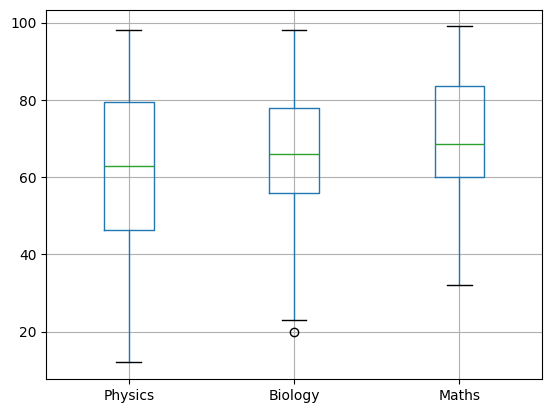

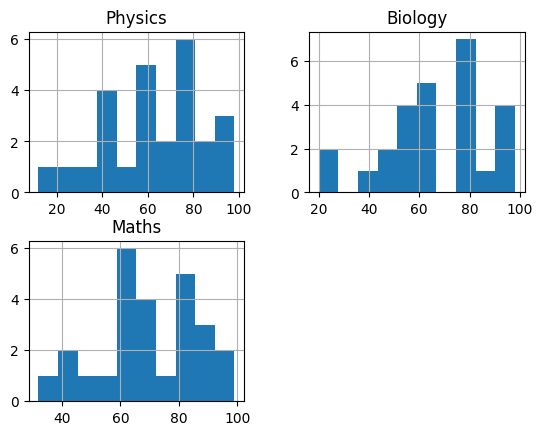

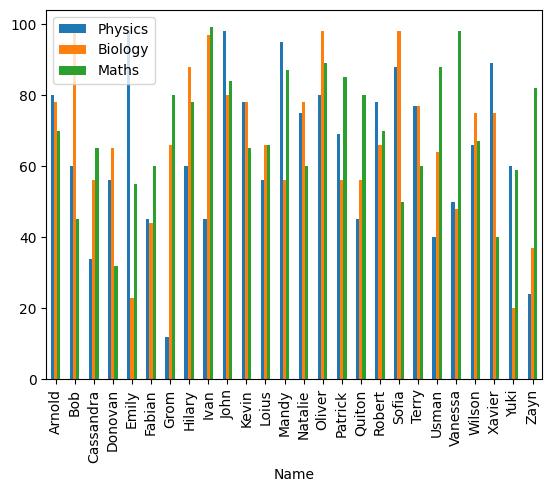

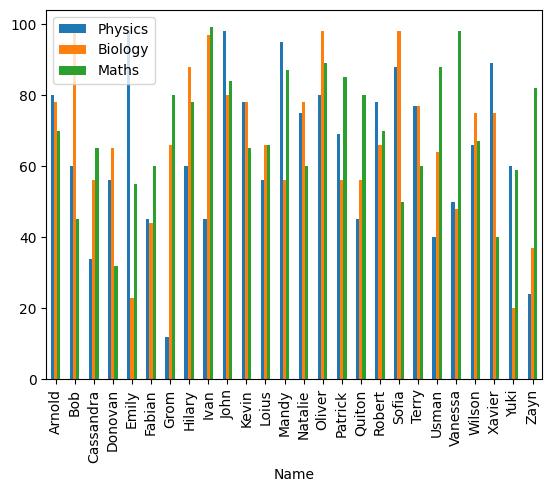

In [18]:
df.plot(kind='bar')
plt.show()

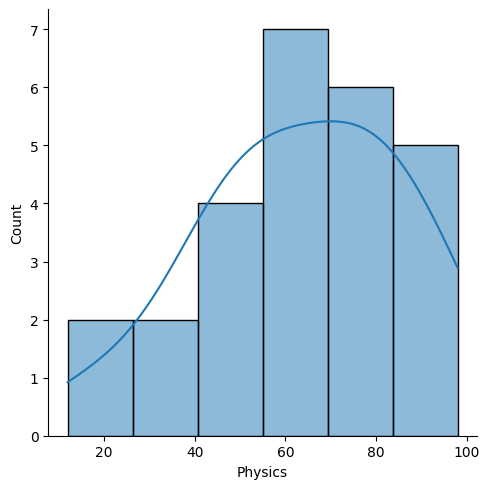

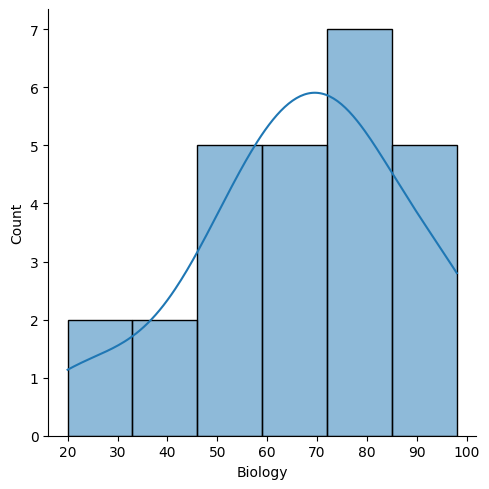

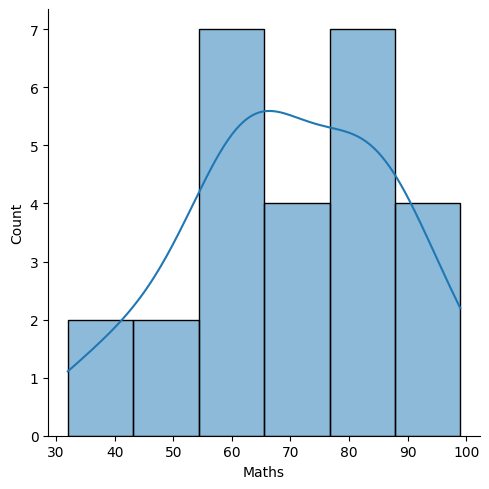

In [23]:
for x in df.columns:
    sns.displot(df[x], kde=True)
plt.show()

In [26]:
df.skew()
# plt.show()

Physics   -0.389855
Biology   -0.478819
Maths     -0.282902
dtype: float64

## Data Transformation
Scikit-learn offres a "preprosessing" module that can perform various type of data transformation   


In [28]:
from sklearn.preprocessing import PowerTransformer

In [29]:
power_transform = PowerTransformer(method='box-cox', standardize=False)

To fit any transforer from sklearn, the input needs to be in the shape of (n_samples, n_features) <--2d array.

In [31]:
biology = df['Biology'].values
biology.shape

(26,)

In [33]:
# Convert the 1d array tinto 2d
biology = biology.reshape(-1, 1)
print(biology.shape)

(26, 1)


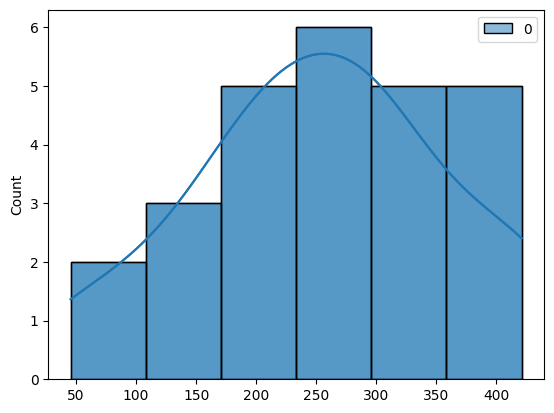

In [38]:
biology_transformed = power_transform.fit_transform(biology)
sns.histplot(biology_transformed, kde=True)
plt.show()

In [39]:
import scipy.stats
print(scipy.stats.skew(biology_transformed))

[-0.13603041]


0.8302736094273664


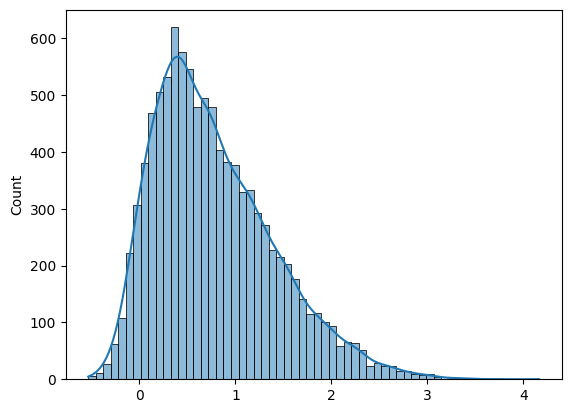

In [45]:
# Generate a data with even more skewness
from scipy.stats import skewnorm

a = skewnorm.rvs(5,size=10000)
sns.histplot(a, kde=True)
plt.show()

In [46]:
print(scipy.stats.skew(a))

0.8302736094273664


The data is heaviliy positively skewed, so we eant to transform it to reduce the skewness. This time let's use Log Transform, but this function is not available as a built-9in function in skleanr.processing. So we need to define ourselves using Functon Transformer class.

In [48]:
# import Function Transformer
from sklearn.preprocessing import FunctionTransformer

In [49]:
log1p_transformer = FunctionTransformer(np.log1p, validate=True)
a = a.reshape(-1, 1)
a_transformed = log1p_transformer.transform(a)

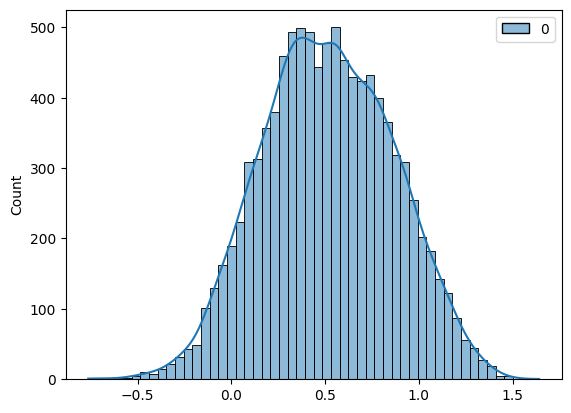

In [50]:
sns.histplot(a_transformed, kde=True)
plt.show()

In [51]:
print(scipy.stats.skew(a_transformed))

[-0.00347495]


## Feature scalling
The main purpose of feature scaling is to reduce data bias.
The are to main methos of feature scaling:

1. min-max scaling: scale basd on the minimum and maximum value of the data. typically scale the minimum and maximum value into 0 and 1.
2. Standart scaling: scale the data into standard normal distribution (0 mean, 1 std). This is archieved by the z-score transformation forumula: 

$$ (x-\mu) /\sigma $$

In [53]:
# import the scalers
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [54]:
minmax_scaler = MinMaxScaler()
standard_scaler = StandardScaler()


In [56]:
df_minmax = minmax_scaler.fit_transform(df)
type(df_minmax)

numpy.ndarray

In [58]:
# arrange the data back to dataframe
df_minmax = pd.DataFrame(df_minmax, columns=df.columns, index=df.index)
df_minmax.head()

,Physics,Biology,Maths
Name,,,
Arnold,0.790698,0.743590,0.567164
Bob,0.558140,1.000000,0.194030
Cassandra,0.255814,0.461538,0.492537
Donovan,0.511628,0.576923,0.000000
Emily,1.000000,0.038462,0.343284


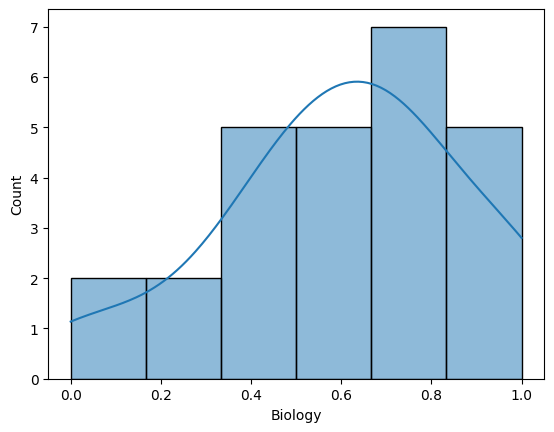

In [59]:
sns.histplot(df_minmax['Biology'], kde=True)
plt.show()

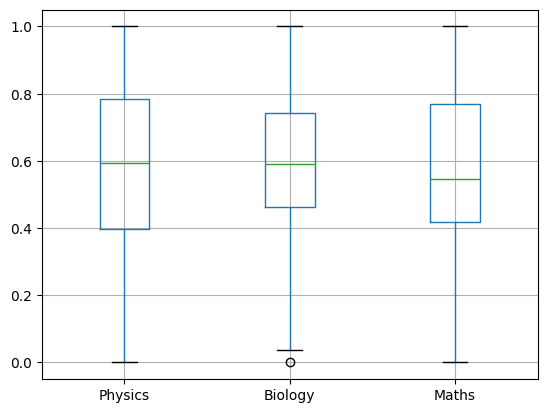

In [60]:
df_minmax.boxplot()
plt.show()

In [61]:
df_standard = standard_scaler.fit_transform(df)
type(df_standard)

numpy.ndarray

In [62]:
df_standard = pd.DataFrame(df_standard, columns=df.columns, index=df.index)
df_standard.head()

,Physics,Biology,Maths
Name,,,
Arnold,0.727807,0.523052,0.013572
Bob,-0.169017,1.477393,-1.456760
Cassandra,-1.334888,-0.526723,-0.280494
Donovan,-0.348382,-0.097269,-2.221333
Emily,1.534948,-2.101384,-0.868627


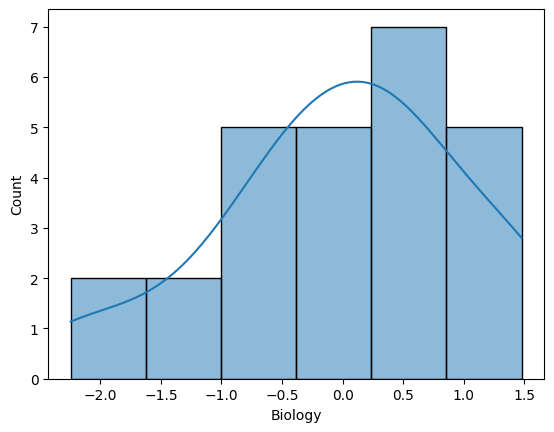

In [63]:
sns.histplot(df_standard['Biology'], kde=True)
plt.show()

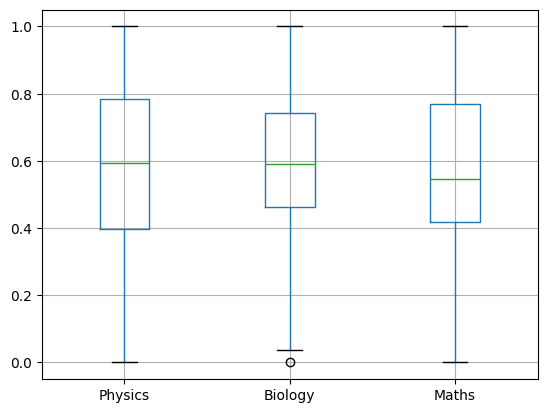

In [64]:
df_minmax.boxplot()
plt.show()
